<a href="https://colab.research.google.com/github/polina-minaeva/clustering/blob/main/13_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У нас есть изображение. Попробуем упростить его, уменьшив количество цветов в палитре. Для этого воспользуемся разными видами кластеризации: KMeans, DBSCAN и алгомеративная кластеризация.

1. Получение данных и загрузка изображения

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

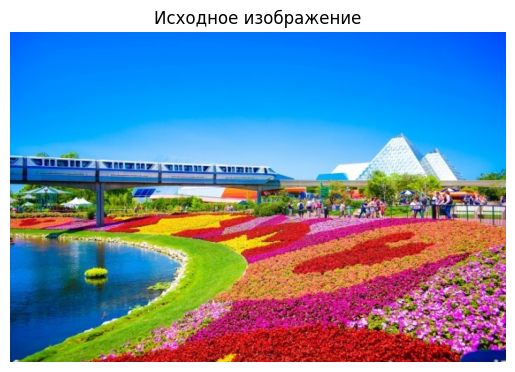

In [ ]:
original_image = cv2.imread('view.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Исходное изображение')
plt.show()

In [ ]:
original_image.shape

(466, 700, 3)

In [ ]:
#для создания моделей нам понадобиться изменить размер массива original_image

reshaped_image = np.reshape(original_image, ((original_image.shape[0] * original_image.shape[1]), 3))
reshaped_image.shape

(326200, 3)

2. Изменение изображения. Отрисовка изображения с n кластерами с помощью модели KMeans

Построим модели с 20 и 5 кластерами.

In [ ]:
kmcl = KMeans(n_clusters=20)
target = kmcl.fit_predict(reshaped_image) #спрогнозированные кластеры
color_space = kmcl.cluster_centers_ #координаты центроидов

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmcl.cluster_centers_[target]

array([[252.46586956, 121.56064741,   0.42666694],
       [252.46586956, 121.56064741,   0.42666694],
       [252.46586956, 121.56064741,   0.42666694],
       ...,
       [236.72502135, 232.18157558, 228.29237831],
       [236.72502135, 232.18157558, 228.29237831],
       [142.02334967, 169.23436149, 191.09080427]])

In [ ]:
target

array([10, 10, 10, ..., 18, 18, 12], dtype=int32)

In [ ]:
color_space.astype('uint8')[target].shape

(326200, 3)

In [ ]:
output_image = np.reshape(color_space.astype('uint8')[target], (original_image.shape[0], original_image.shape[1], 3))
output_image

array([[[252, 121,   0],
        [252, 121,   0],
        [252, 121,   0],
        ...,
        [252, 121,   0],
        [252, 121,   0],
        [252, 121,   0]],

       [[252, 121,   0],
        [252, 121,   0],
        [252, 121,   0],
        ...,
        [252, 121,   0],
        [252, 121,   0],
        [252, 121,   0]],

       [[252, 121,   0],
        [252, 121,   0],
        [252, 121,   0],
        ...,
        [252, 121,   0],
        [252, 121,   0],
        [252, 121,   0]],

       ...,

       [[112,  65,  15],
        [112,  65,  15],
        [112,  65,  15],
        ...,
        [112,  65,  15],
        [112,  65,  15],
        [112,  65,  15]],

       [[112,  65,  15],
        [112,  65,  15],
        [112,  65,  15],
        ...,
        [142, 169, 191],
        [142, 169, 191],
        [142, 169, 191]],

       [[112,  65,  15],
        [112,  65,  15],
        [112,  65,  15],
        ...,
        [236, 232, 228],
        [236, 232, 228],
        [142, 169, 191]]

In [ ]:
output_image.shape

(466, 700, 3)

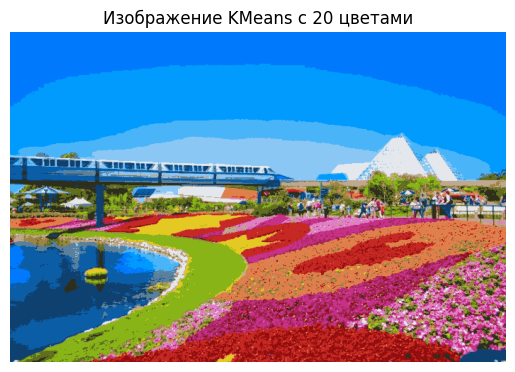

In [ ]:
kmcl_image_20 = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(kmcl_image_20)
plt.axis('off')
plt.title('Изображение KMeans с 20 цветами')
plt.show()

In [ ]:
#посчитаем метрику схожести изображений

from skimage.metrics import structural_similarity

structural_similarity(original_image, kmcl_image_20, win_size=3)

-0.49552076533817146

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


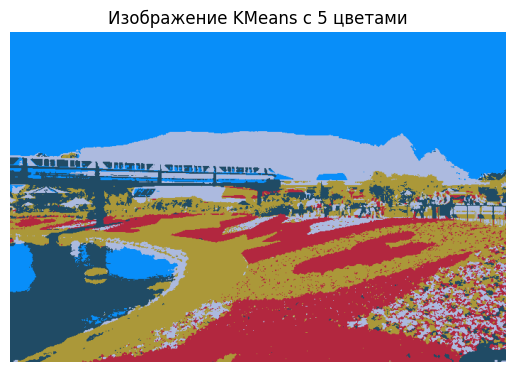

In [ ]:
kmcl_5 = KMeans(n_clusters=5)
target_5 = kmcl_5.fit_predict(reshaped_image)
color_space_5 = kmcl_5.cluster_centers_

output_image_5 = np.reshape(color_space_5.astype('uint8')[target_5], (original_image.shape[0], original_image.shape[1], 3))
kmcl_image_5 = cv2.cvtColor(output_image_5, cv2.COLOR_BGR2RGB)
plt.imshow(kmcl_image_5)
plt.axis('off')
plt.title('Изображение KMeans с 5 цветами')
plt.show()

In [ ]:
#посчитаем метрику

structural_similarity(original_image, kmcl_image_5, win_size=3)

-0.5338977967350631

Предсказуемо изображение с 20 кластерами оказалось более походим на изначальное, но разница с 5 кластерами небольшая.

3. Отрисовка изображения с n кластерами с помощью модели DBSCAN

In [ ]:
#теперь воспользуемся моделью DBSCAN, ей передавать число кластеров не нужно

from sklearn.cluster import DBSCAN

dbs_cl = DBSCAN(eps=3, min_samples=2).fit(reshaped_image)
dbs_cl

DBSCAN(eps=3, min_samples=2)

In [ ]:
dbs_cl.labels_ #набор кластеров по порядку для каждой точки

array([   0,    0,    0, ..., 4981, 4981,  953])

In [ ]:
#чтобы отрисовать новое изображение, нам понадобятся средние значения цветов каждого кластера
#для создания нужного массива джанных воспользуемся функционалом пандас и нампи

In [ ]:
import pandas as pd

In [ ]:
pd_ = pd.DataFrame(reshaped_image)

In [ ]:
import statistics as st

In [ ]:
pd_['clusters'] = dbs_cl.labels_

In [ ]:
pd_

,0,1,2,clusters
0,255,92,0,0
1,255,92,0,0
2,253,93,0,0
3,253,93,0,0
4,253,93,0,0
...,...,...,...,...
326195,177,204,195,-1
326196,183,206,198,3284
326197,189,213,203,4981
326198,187,212,202,4981


In [ ]:
pd_II = pd_.groupby(['clusters']).mean().astype('uint8')
pd_II = pd_II.reset_index()
pd_II.head()
#мы получили набор из "средних" цветов для каждого кластера

,clusters,0,1,2
0,-1,114,113,146
1,0,200,144,51
2,1,239,167,25
3,2,244,172,34
4,3,237,172,49


In [ ]:
pd_II = pd_II.reset_index(drop=True)
pd_II.head()

,clusters,0,1,2
0,-1,114,113,146
1,0,200,144,51
2,1,239,167,25
3,2,244,172,34
4,3,237,172,49


In [ ]:
pd_all = pd_.merge(pd_II, left_on='clusters', right_on='clusters', how='outer')
pd_all.head()

,0_x,1_x,2_x,clusters,0_y,1_y,2_y
0,255,92,0,0,200,144,51
1,255,92,0,0,200,144,51
2,253,93,0,0,200,144,51
3,253,93,0,0,200,144,51
4,253,93,0,0,200,144,51


In [ ]:
arr_col = pd_all[['0_y', '1_y', '2_y']].to_numpy() #это наши цвета с показателями

In [ ]:
arr_col.shape

(326200, 3)

In [ ]:
arr_col = arr_col.reshape(466, 700, 3)

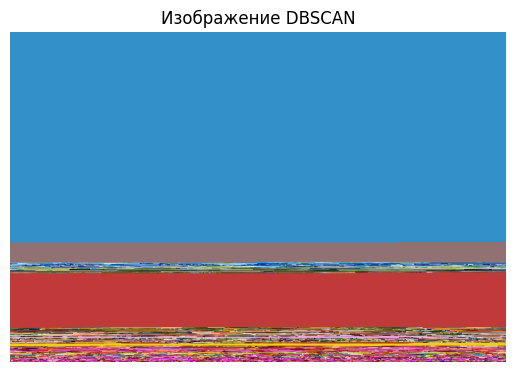

In [ ]:
dbs_image = cv2.cvtColor(arr_col, cv2.COLOR_BGR2RGB)
plt.imshow(dbs_image)
plt.axis('off')
plt.title('Изображение DBSCAN')
plt.show()

In [ ]:
#посчитаем метрику

structural_similarity(original_image, dbs_image, win_size=3)

-0.320493515951579

Метрика модели DBSCAN лучше, чем метрика KMeans. Но по изображению можно судить, что модель DBSCAN справилась хуже, чем кластеризация KMeans.

4. Отрисовка изображения с n кластерами с помощью модели иерархической кластеризации

In [ ]:
from sklearn.cluster import AgglomerativeClustering

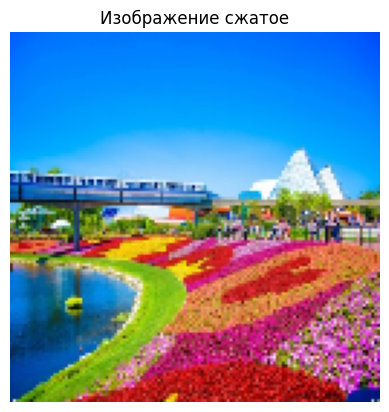

In [ ]:
original_image = cv2.imread('view.jpg')
img = cv2.resize(original_image, (128, 128)) #сожмем изображение для сохранения оперативной памяти
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Изображение сжатое')
plt.show()

In [ ]:
img.shape

(128, 128, 3)

In [ ]:
reshaped_image2 = np.reshape(img, ((img.shape[0] * img.shape[1]), 3))
reshaped_image2.shape

(16384, 3)

Построим модель с 20 кластерами.

In [ ]:
agglcl = AgglomerativeClustering(n_clusters=20).fit(reshaped_image2)
agglcl

AgglomerativeClustering(n_clusters=20)

In [ ]:
agglcl.labels_ #кластеры для каждого цвета в выборке

array([12, 12, 12, ...,  5, 19, 13])

In [ ]:
import pandas as pd
import statistics as st

pd_ac = pd.DataFrame(reshaped_image2)

In [ ]:
pd_ac['clusters'] = agglcl.labels_
pd_ac.head()

,0,1,2,clusters
0,253,93,0,12
1,255,96,0,12
2,254,97,0,12
3,254,99,0,12
4,255,101,0,12


In [ ]:
pd_ac_2 = pd_ac.groupby(['clusters']).mean().astype('uint8')
pd_ac_2 = pd_ac_2.reset_index()
pd_ac_2.head()
#мы получили набор из "средних" цветов для каждого кластера

,clusters,0,1,2
0,0,38,121,127
1,1,26,29,182
2,2,115,53,189
3,3,194,143,88
4,4,253,156,2


In [ ]:
pd_ac_2 = pd_ac_2.reset_index(drop=True)
pd_ac_2.head()

,clusters,0,1,2
0,0,38,121,127
1,1,26,29,182
2,2,115,53,189
3,3,194,143,88
4,4,253,156,2


In [ ]:
pd_ac_all = pd_ac.merge(pd_ac_2, left_on='clusters', right_on='clusters', how='outer')
pd_ac_all.head()

,0_x,1_x,2_x,clusters,0_y,1_y,2_y
0,253,93,0,12,252,121,0
1,255,96,0,12,252,121,0
2,254,97,0,12,252,121,0
3,254,99,0,12,252,121,0
4,255,101,0,12,252,121,0


In [ ]:
arr_col_ac = pd_ac_all[['0_y', '1_y', '2_y']].to_numpy() #это наши цвета с показателями
arr_col_ac.shape

(16384, 3)

In [ ]:
arr_col_ac = arr_col_ac.reshape(128, 128, 3)

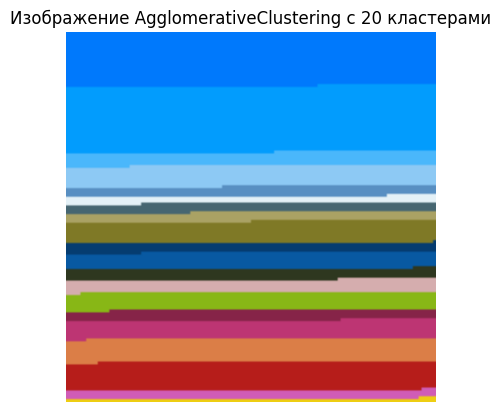

In [ ]:
ac_image_20 = cv2.cvtColor(arr_col_ac, cv2.COLOR_BGR2RGB)
plt.imshow(ac_image_20)
plt.axis('off')
plt.title('Изображение AgglomerativeClustering с 20 кластерами')
plt.show()

In [ ]:
#посчитаем метрику

structural_similarity(img, ac_image_20, win_size=3)

-0.4089836499862181

И наконец, изображение с 5 кластерами.

In [ ]:
agglcl_5 = AgglomerativeClustering(n_clusters=5).fit(reshaped_image2)

pd_ac_5 = pd.DataFrame(reshaped_image2)

pd_ac_5['clusters'] = agglcl_5.labels_

pd_ac_II_5 = pd_ac_5.groupby(['clusters']).mean().astype('uint8')
pd_ac_II_5 = pd_ac_II_5.reset_index()

pd_ac_II_5 = pd_ac_II_5.reset_index(drop=True)

pd_ac_all_5 = pd_ac_5.merge(pd_ac_II_5, left_on='clusters', right_on='clusters', how='outer')

arr_col_ac_5 = pd_ac_all_5[['0_y', '1_y', '2_y']].to_numpy() #это наши цвета с показателями

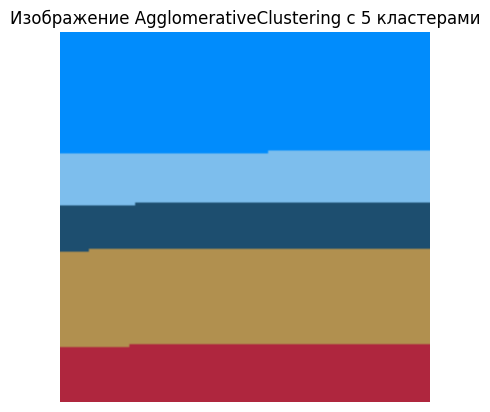

In [ ]:
arr_col_ac_5 = arr_col_ac_5.reshape(128, 128, 3)

ac_image_5 = cv2.cvtColor(arr_col_ac_5, cv2.COLOR_BGR2RGB)
plt.imshow(ac_image_5)
plt.axis('off')
plt.title('Изображение AgglomerativeClustering с 5 кластерами')
plt.show()

In [ ]:
#посчитаем метрику

structural_similarity(img, ac_image_5, win_size=3)

-0.4627784970996392

Метрики AgglomerativeClustering лучше, чем у KMeans, и хуже, чем DBSCAN. Однако по-прежнему KMeans дает четкую картинку, которой нет ни у AgglomerativeClustering, ни у DBSCAN.